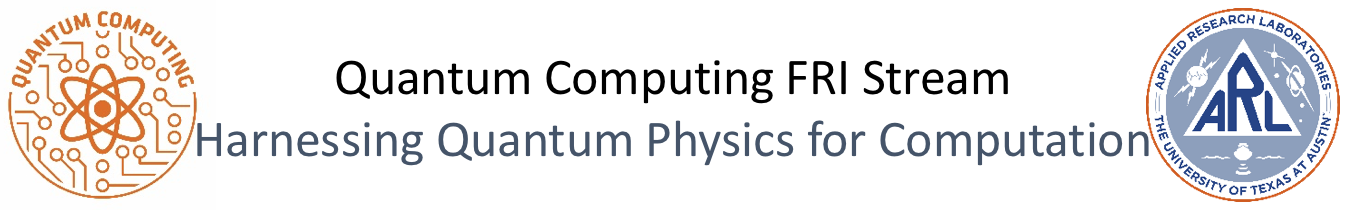

# "Perfect" Quantum Error Correction
## Lesson 17

### Installations and Imports

In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_state_city

In [3]:
def rand(a=0, b=1):
    return a + (b-a)*np.random.random()

## Today's Objectives

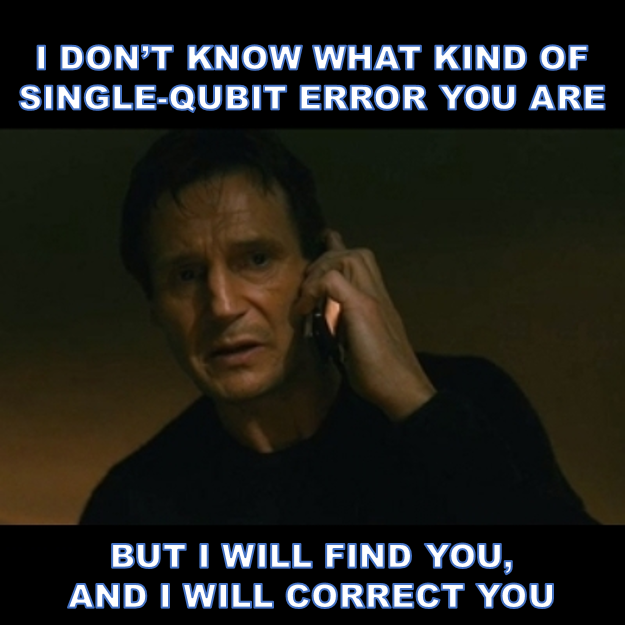

- Implement a quantum error correction protocol that protects against an arbitrary single-qubit error.

## Three-Qubit Repetition Code

In [4]:
qc=QuantumCircuit(3)

#Create an arbitrary state on q[0]
theta = np.arccos(2*rand()-1)
phi = 2*np.pi*rand()
lamb = 2*np.pi*rand()

qc.u(theta, phi, lamb, 0)



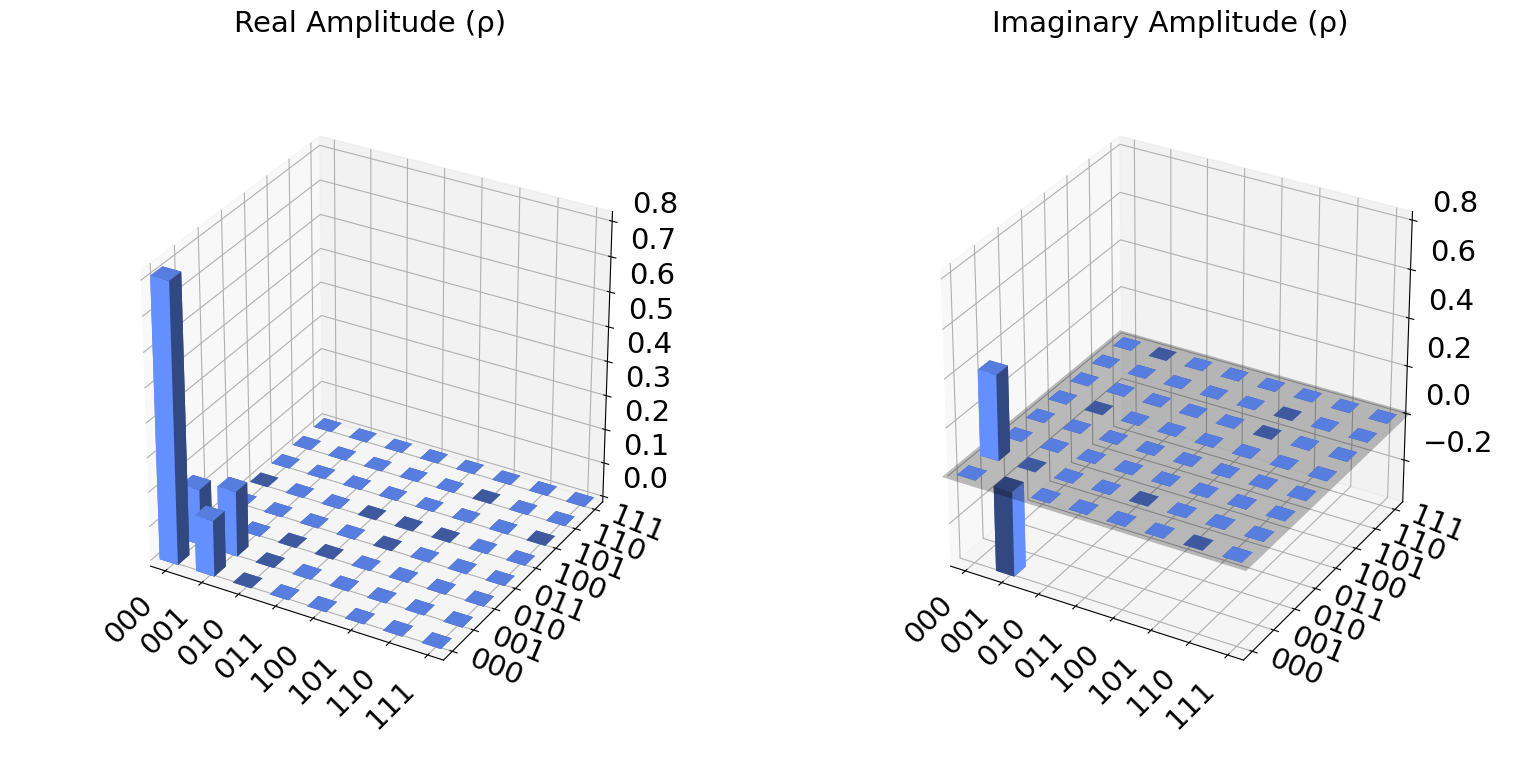

In [5]:
vec = Statevector.from_instruction(qc)
plot_state_city(vec)

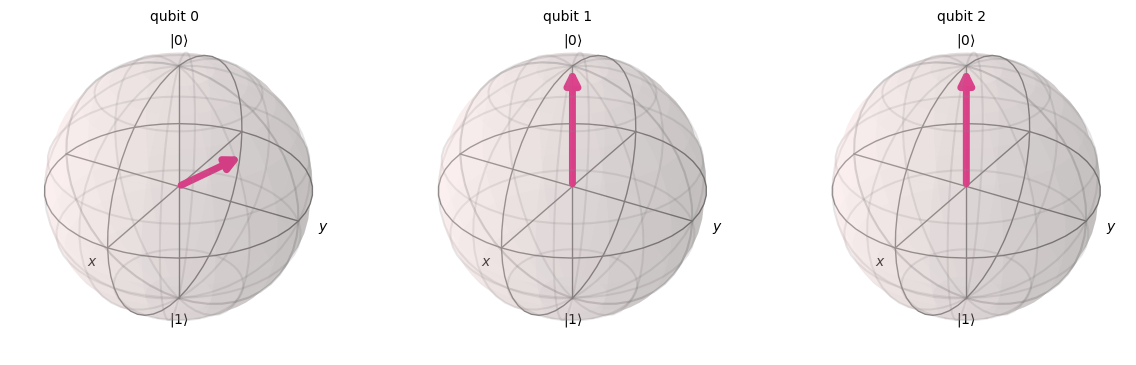

In [6]:
plot_bloch_multivector(vec)

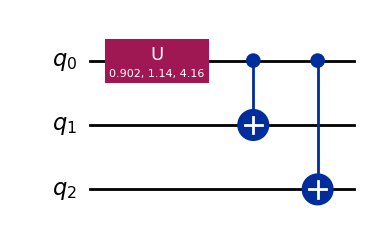

In [7]:
qc.cx(0,1)
qc.cx(0,2)

qc.draw('mpl')

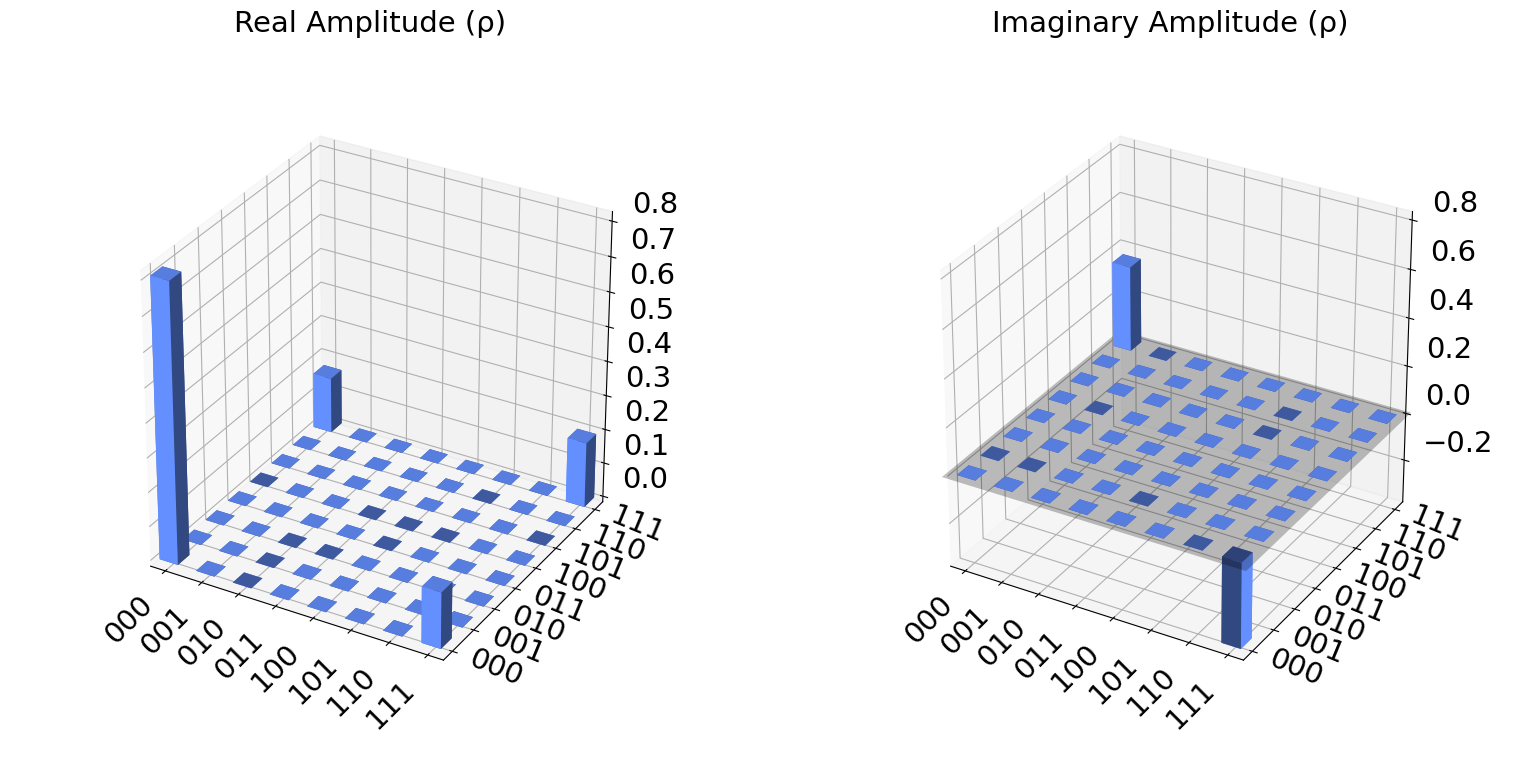

In [8]:
vec = Statevector.from_instruction(qc)
plot_state_city(vec)

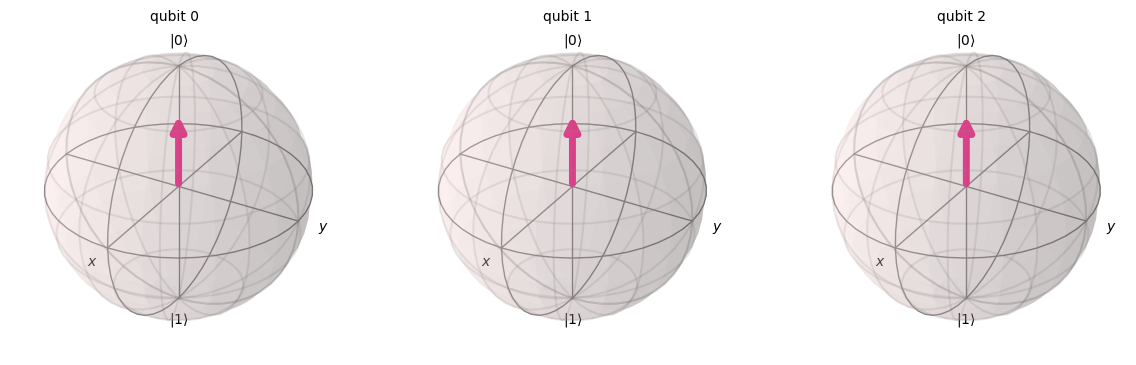

In [9]:
plot_bloch_multivector(vec)

### Bit-Flip Syndrome Measurement

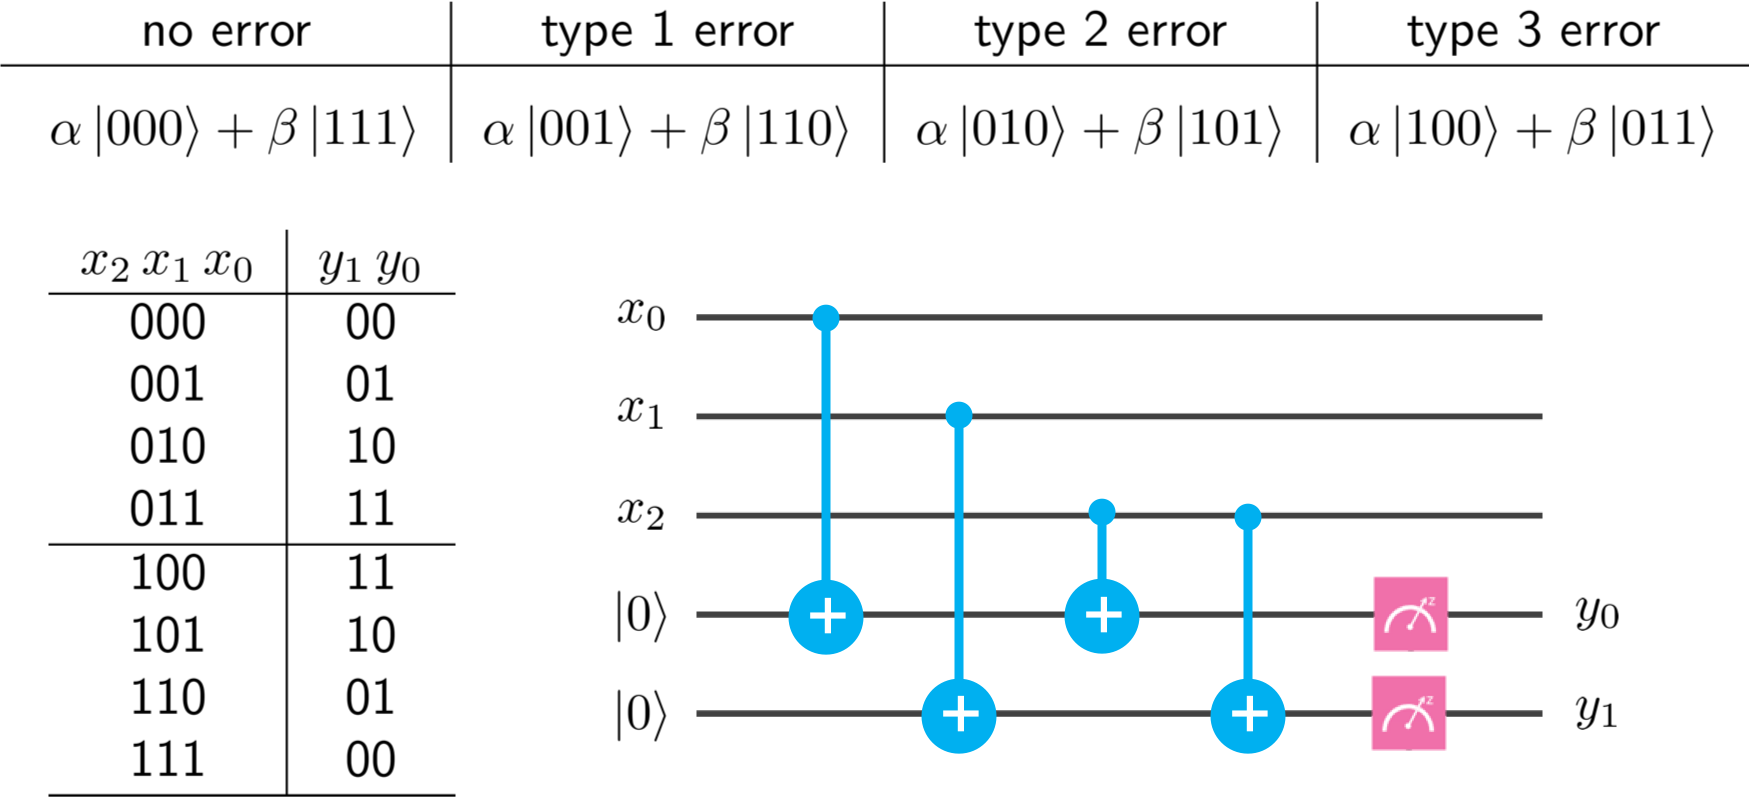

## Beyond Bit Flips


- Quantum errors are more than just bit flips.
- In general, errors can take us from a pure state to a mixed state.
  - A mixed state can be thought of as a random ensemble of pure states.
  - Such processes can be quite complicated and difficult to characterize.
- Let’s suppose that the errors are small and isolated:
  - Only one qubit suffers an error.
  - The error could be any single-qubit unitary gate.
- It turns out you can correct such errors!
  - We only need a few gates to correct an uncountable set of errors.
  - We've seen how nesting a phase-flip code in a bit-flip code can protect our state
  - __Five qubits is enough.__ (In fact, it's minimal)

### “Perfect” Quantum Error Correction

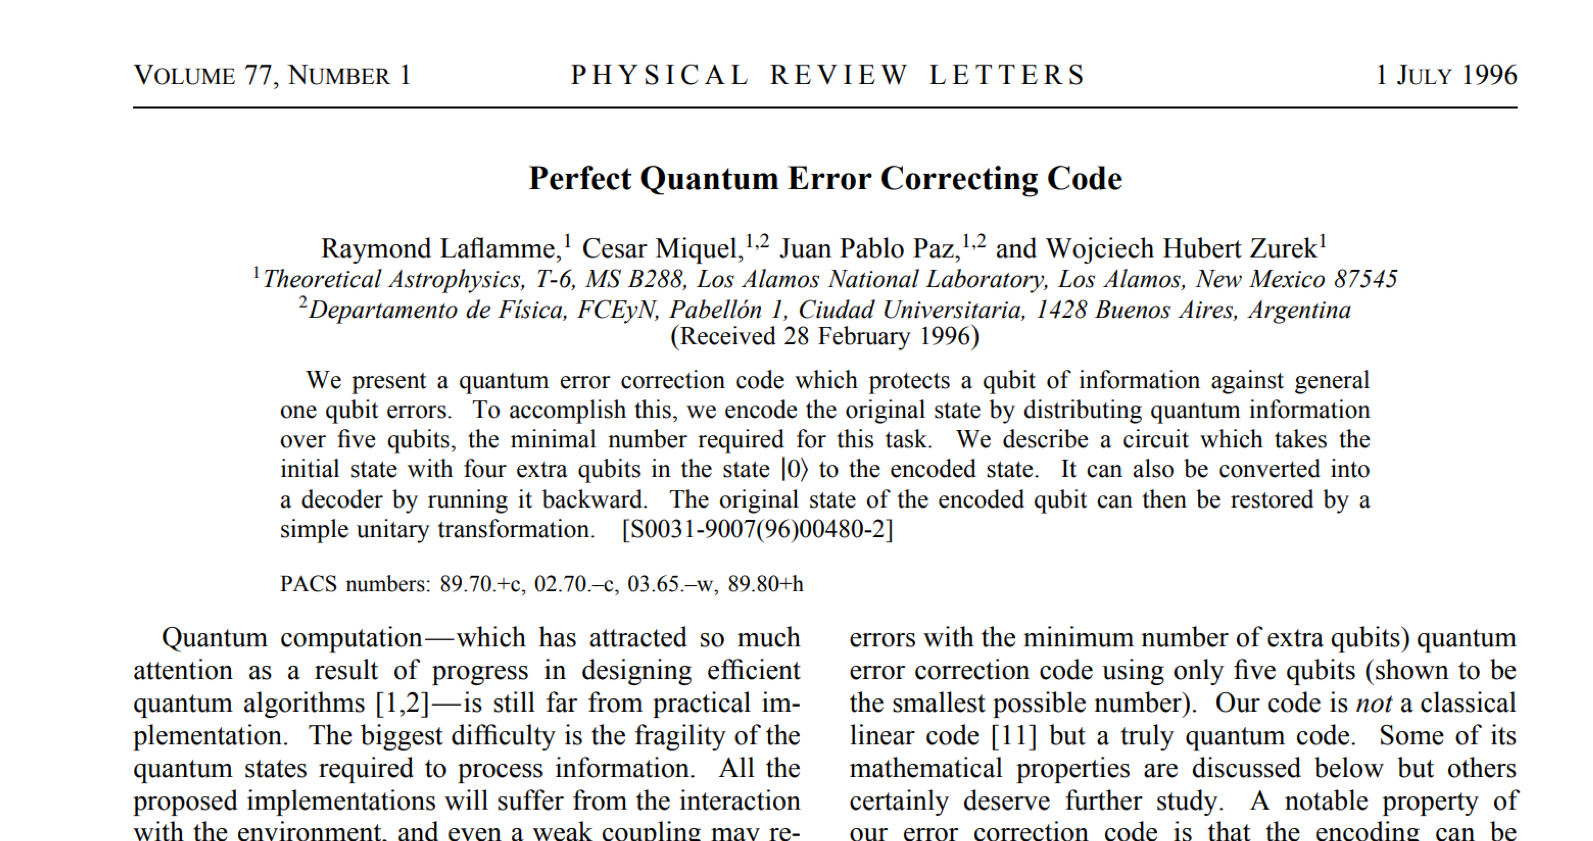

From Laflamme, Miquel, Paz, Zurek, "Perfect Quantum Error Correcting Code." PRL 77, 1, July 1996. https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.77.198

Abstract text: We present a quantum error correction code which protects a qubit of information against general one qubit errors. To accomplish this, we encode the original state by distributing quantum information over five qubits, the minimal number required for this task. We describe a circuit which takes the initial state with four extra qubits in the state $\lvert 0\rangle$ to the encoded state. It can also be converted into a decoder by running it backward. The original state of the encoded qubit can then be restored by a simple unitary transformation.

The encoded qubit is in a 2-dimensional subspace of a 32-dimensional Hilbert space.

__What must the dimension of the error subspace be?__

### 5-Qubit Syndrome Circuit

$$\textbf{Stabilizers}$$

$$\begin{align}
\mathbf{M}_{0}=&\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4} \\
\mathbf{M}_{1}=&\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0} \\
\mathbf{M}_{2}=&\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1} \\
\mathbf{M}_{3}=&\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2} \\
\end{align}$$

This error correction code can be characterized by its **stabilizer operators**. The stabilizer operators correspond to particular syndrome diagnoses through their lack of commutivity with possible single-qubit errors.

For example, a bit-flip error on qubit 1 $\mathbf{X}_{1}$ does not commute with $\mathbf{M}_{0}$ or $\mathbf{M}_{2}$.

$$\mathbf{X}_{1}\mathbf{M}_{0}=-\mathbf{M}_{0}\mathbf{X}_{1}$$
$$\mathbf{X}_{1}\mathbf{M}_{2}=-\mathbf{M}_{2}\mathbf{X}_{1}$$

It can also be shown that the stabilizers all __commute__ with one another;
therefore, they can be measured __simultaneously__.

$\left(\text{To see this, use the fact that }\mathbf{XZ}=-\mathbf{ZX}\right)$

Each stabilizer consists of single-qubit roots of the Identity operator.

$$\begin{align}
\mathbf{M}_{0}=&\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4} \qquad \mathbf{M}_{0}^{2}=\left(\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4}\right)\left(\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4}\right)=\mathbf{I} \\
\mathbf{M}_{1}=&\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0} \qquad \mathbf{M}_{1}^{2}=\left(\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0}\right)\left(\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0}\right)=\mathbf{I} \\
\mathbf{M}_{2}=&\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1} \qquad \mathbf{M}_{2}^{2}=\left(\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1}\right)\left(\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1}\right)=\mathbf{I} \\
\mathbf{M}_{3}=&\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2} \qquad \mathbf{M}_{3}^{2}=\left(\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2}\right)\left(\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2}\right)=\mathbf{I}
\end{align}$$

The eigenvectors of the stabilizers are therefore $\pm 1$



### <font color=green>Exercise</font>

Choose two of the given stabilizer operators and show that they commute.

You may type out your answer or upload an image of your writing.

(Note, I implicitly assumed that each single qubit operator commutes when acted on seperate qubit)
Showing
$$
\left[ M_{0},M_{1} \right] = 0
$$

First I'll calculate them explicitly

$$
\begin{align}
\left[ M_{0},M_{1} \right]  = 0 \\
M_{0}M_{1}-M_{1}M_{0} \\
M_{0}M_{1}=\left( Z_{1}X_{2}X_{3}Z_{4} \right) (Z_{2}X_{3}X_{4}Z_{0}) \\
=Z_{0}Z_{1}Z_{2}Z_{4}X_{2}X_{4}
\end{align}
$$
Then for $M_{1}M_{0}$
$$
\begin{align}
\left( Z_{2}X_{3}X_{4}Z_{0} \right) (Z_{1}X_{2}X_{3}Z_{4}) \\
=Z_{0}Z_{1}Z_{2}Z_{4}X_{2}X_{4}
\end{align}
$$
Then
$$
\left[ M_{0},M_{1} \right]  = Z_{0}Z_{1}Z_{2}Z_{4}X_{2}X_{4}-Z_{0}Z_{1}Z_{2}Z_{4}X_{2}X_{4}=0
$$




### 5-Qubit Encoding Scheme

The 5-qubit encoded state can be expressed in the encoded basis states $\lvert \overline{0} \rangle,\lvert \overline{1} \rangle$ which is defined below as the result of transforming the unencoded qubits with combinations of the stabilizer operators.

$$\lvert \overline{0} \rangle = \frac{1}{4} \left(\mathbf{I}+\mathbf{M}_{0}\right)\left(\mathbf{I}+\mathbf{M}_{1}\right)\left(\mathbf{I}+\mathbf{M}_{2}\right)\left(\mathbf{I}+\mathbf{M}_{3}\right)\lvert 00000 \rangle$$

$$\lvert \overline{1} \rangle = \frac{1}{4} \left(\mathbf{I}+\mathbf{M}_{0}\right)\left(\mathbf{I}+\mathbf{M}_{1}\right)\left(\mathbf{I}+\mathbf{M}_{2}\right)\left(\mathbf{I}+\mathbf{M}_{3}\right)\lvert 11111 \rangle$$

The circuit to implement such a transformation on  an arbitrary, single-qubit state $\lvert x \rangle$ is given by:

$$\mathbf{H}_{0}\mathbf{H}_{1}\mathbf{C}_{24}\mathbf{C}_{14}\mathbf{C}_{04}\mathbf{H}_{0}\mathbf{H}_{3}\mathbf{C}_{23}\mathbf{C}_{03}\mathbf{H}_{2}\mathbf{C}_{12}\mathbf{C}_{02}\mathbf{H}_{0}\mathbf{H}_{1}\mathbf{C}_{01}\mathbf{Z}_{0}\mathbf{H}_{0}\mathbf{Z}_{0}\lvert 0000x\rangle$$

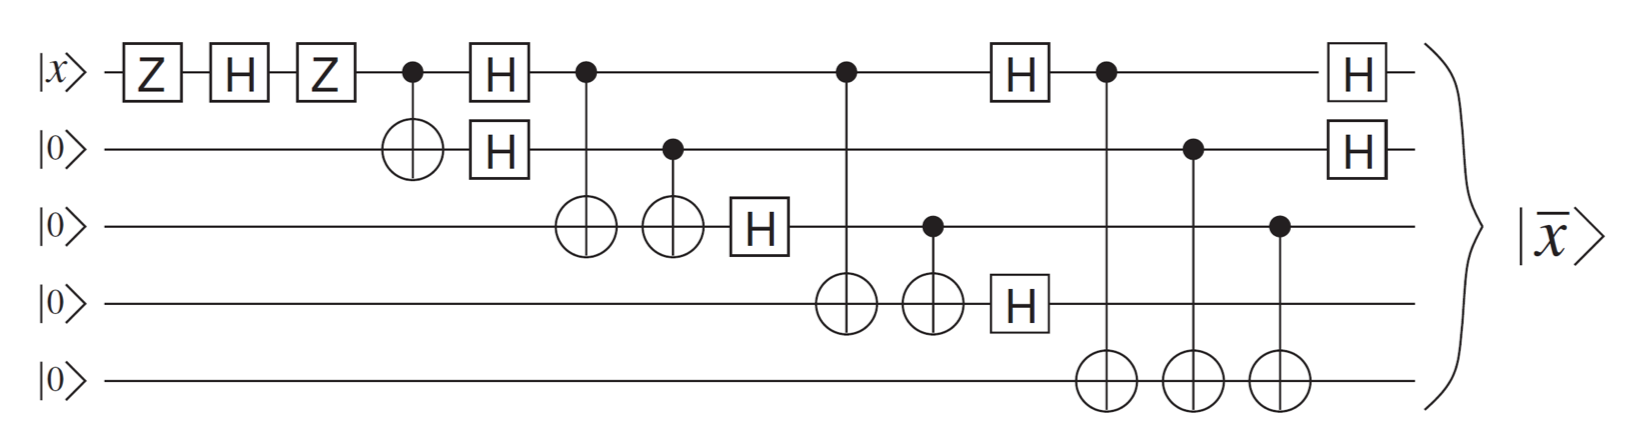

### Diagnosing Errors


$$\begin{align}
\mathbf{M}_{0}=&\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4} \\
\mathbf{M}_{1}=&\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0} \\
\mathbf{M}_{2}=&\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1} \\
\mathbf{M}_{3}=&\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2} \\
\end{align}$$

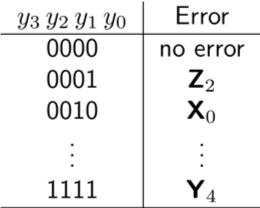

#### Like we saw in the 3-qubit repetition code, we make a syndrome measurement in order to diagnose an error.

Using the given stabilizer operators, we can make syndrome measurements by controlling on the auxiliary qubits in superposition. The fact that different types of errors commute with different combinations of the stabilizers results in a unique syndrome corresponding to each possible error.

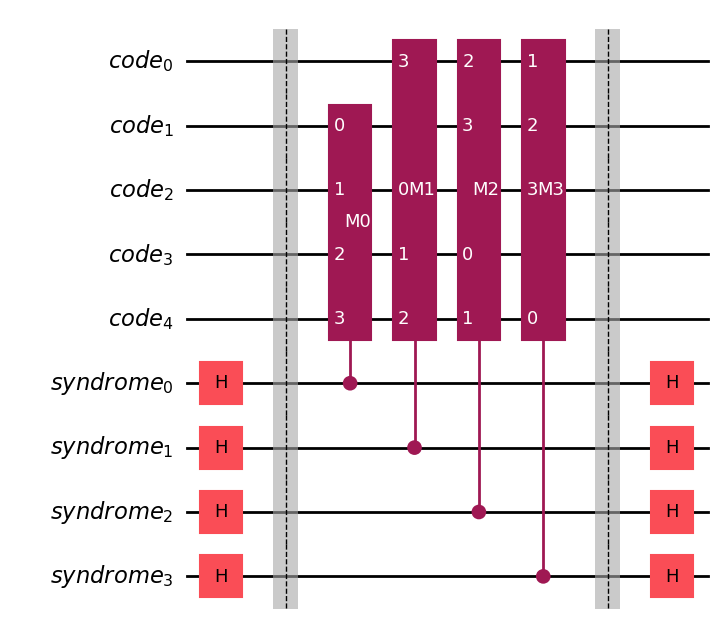

$$\begin{align}
\mathbf{M}_{0}=&\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4} \\
\mathbf{M}_{1}=&\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0} \\
\mathbf{M}_{2}=&\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1} \\
\mathbf{M}_{3}=&\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2} \\
\end{align}$$

We use a Hadamard on each auxiliary qubit (syndrome qubit) to initialize it in superposition. After the contolled application of the stabilizer operators, we convert back into the computational basis with another Hadamard on each of the auxiliaries.

Because of the "phase kickback trick," the control qubits (syndrome qubits) indicate any errors in the target qubits (code qubits).

The syndrome qubits are then measured without disturbing the code qubits.

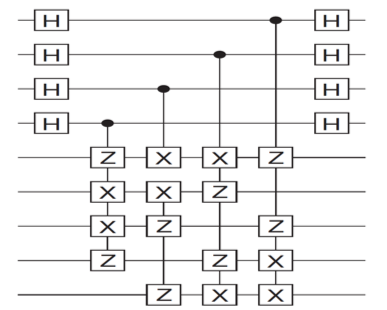

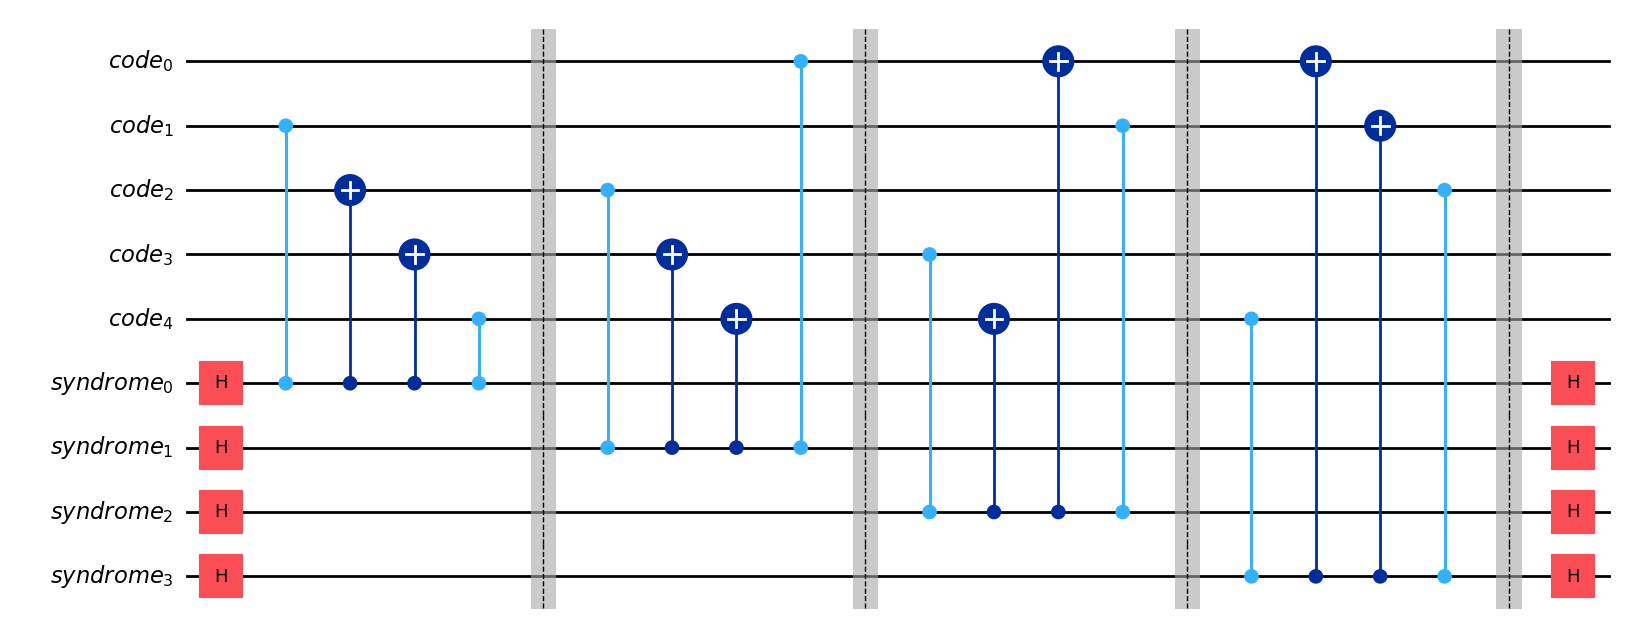